# Maze Solver 101
## Import Libray and Maze

In [1]:
import numpy as np
import matplotlib.pyplot as plt

maze_file = open('maze.txt', 'r')
maze_cells_ = list(maze_file.readlines())
maze_cells_evaled = [eval(i) for i in maze_cells_]

maze_l = int((len(maze_cells_evaled))**0.5) #maze length
maze = []
for r in range(maze_l):
    maze_row = []
    for c in range(maze_l):
        maze_row.append(maze_cells_evaled[maze_l * r + c])
    
    maze.append(maze_row)
maze = [*(zip(*maze))] # tranpose maze to ensure it is in the correct orientation
#print(maze)

(51, 51)


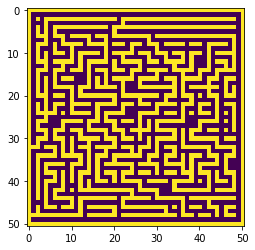

In [2]:
maze_arr = np.asarray(maze)
print(maze_arr.shape)
plt.imshow(maze_arr)
plt.show()

## Breadth First Search on Maze
Since the graph is unweighted, we ca use BFS to get the shortest distance from the source to all cells.

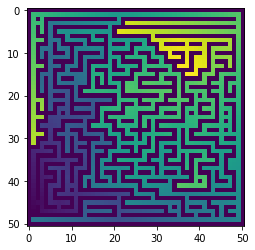

In [3]:
# The path is empty if the maze value is 0
s_c = 1 # starting squares
s_r = 47
assert(maze_arr[s_r][s_c] == False) #make sure the starting square is empty

dist = np.empty((51,51), int);
for i in range(51):
    for j in range(51):
        dist[i][j] = -1
q = [] #queue
q.append((s_r, s_c))
dist[s_r][s_c] = 0;

dc = [0, 0, -1, 1]
dr = [-1, 1, 0, 0]

while len(q) > 0:
    # print(q[0])
    (r, c) = q[0]
    q.pop(0)

    for i in range(4):
        nc = c + dc[i]
        nr = r + dr[i]
        
        if ((c < 0) or (c >= 51) or (r < 0) or (r >= 51)):
            continue
        
        if ((dist[nr][nc] != -1) or (maze_arr[nr][nc] == True)):
            continue

        dist[nr][nc] = dist[r][c] + 1
        q.append((nr, nc))

# print(dist)
plt.imshow(dist)
plt.show()


## Backtracking to Find Path

We start from the end and keep moving to squares 1 distance closer to the source!

In [4]:
t_r = 12
t_c = 40

r = t_r
c = t_c

if maze_arr[t_r][t_c] == True:
    print(f"Starting at {t_r}, {t_c} is invalid!")
    assert(maze_arr[t_r][t_c] == False)

path = [(r,c)]

while (r != s_r) or (c != s_c):
    for i in range(4):
        nc = c + dc[i]
        nr = r + dr[i]

        if ((nc < 0) or (nc >= 51) or (nr < 0) or (nr >= 51)):
                continue
        
        if (dist[nr][nc] == dist[r][c] - 1):
            r = nr
            c = nc
            path.append((r,c))
            break

# print(path)


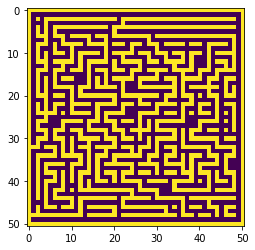

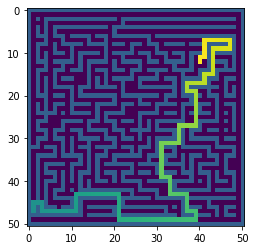

In [5]:
maze_path = np.copy(maze_arr).astype(float)
for i in range(51):
    for j in range(51):
        if maze_path[i][j]:
            maze_path[i][j] = 0.3
        else:
            maze_path[i][j] = 0

path = path[::-1]  
for i, (r, c) in enumerate(path):
    maze_path[r][c] = 0.5 + (0.5)*(i/len(path))

plt.imshow(maze_arr)
plt.show()

plt.imshow(maze_path)
plt.show()